In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import tensorflow as tf

C:\Users\elina\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [3]:
videos = {'ALY': 2, 'ELINA': 4, 'ILYA': 4, 'NASTYA': 2, 'NIKITA': 2, 'OLYA': 2, 'POLINA': 2, 'SACHA': 1, 'SACHA_GOL': 2,
          'SERGEY': 2, 'SLAVA': 3, 'TATYANA': 1, 'TIMOFEY': 2, 'VASYA': 2, 'WOMAN': 2}

In [4]:
label_map = {label: num for num, label in enumerate(numbers)}

In [5]:
label_map

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 '10': 9}

In [6]:
DATA_PATH = os.path.join('cut')

In [7]:
all_data, labels = [], []
max_frames, need_frames = 0, 0
scale_factor = 1.73

for number in numbers:
    for video_autor in videos:
        for video_idx in range(videos[video_autor]):      
            file = os.path.join(DATA_PATH, number, video_autor + '_' + number + '_' + str(video_idx))
            all_data.append(file)
all_data

['cut\\1\\ALY_1_0',
 'cut\\1\\ALY_1_1',
 'cut\\1\\ELINA_1_0',
 'cut\\1\\ELINA_1_1',
 'cut\\1\\ELINA_1_2',
 'cut\\1\\ELINA_1_3',
 'cut\\1\\ILYA_1_0',
 'cut\\1\\ILYA_1_1',
 'cut\\1\\ILYA_1_2',
 'cut\\1\\ILYA_1_3',
 'cut\\1\\NASTYA_1_0',
 'cut\\1\\NASTYA_1_1',
 'cut\\1\\NIKITA_1_0',
 'cut\\1\\NIKITA_1_1',
 'cut\\1\\OLYA_1_0',
 'cut\\1\\OLYA_1_1',
 'cut\\1\\POLINA_1_0',
 'cut\\1\\POLINA_1_1',
 'cut\\1\\SACHA_1_0',
 'cut\\1\\SACHA_GOL_1_0',
 'cut\\1\\SACHA_GOL_1_1',
 'cut\\1\\SERGEY_1_0',
 'cut\\1\\SERGEY_1_1',
 'cut\\1\\SLAVA_1_0',
 'cut\\1\\SLAVA_1_1',
 'cut\\1\\SLAVA_1_2',
 'cut\\1\\TATYANA_1_0',
 'cut\\1\\TIMOFEY_1_0',
 'cut\\1\\TIMOFEY_1_1',
 'cut\\1\\VASYA_1_0',
 'cut\\1\\VASYA_1_1',
 'cut\\1\\WOMAN_1_0',
 'cut\\1\\WOMAN_1_1',
 'cut\\2\\ALY_2_0',
 'cut\\2\\ALY_2_1',
 'cut\\2\\ELINA_2_0',
 'cut\\2\\ELINA_2_1',
 'cut\\2\\ELINA_2_2',
 'cut\\2\\ELINA_2_3',
 'cut\\2\\ILYA_2_0',
 'cut\\2\\ILYA_2_1',
 'cut\\2\\ILYA_2_2',
 'cut\\2\\ILYA_2_3',
 'cut\\2\\NASTYA_2_0',
 'cut\\2\\NASTYA_2_1',
 'cu

In [7]:
all_data, labels = [], []
max_frames, need_frames = 0, 0
scale_factor = 1.73

for number in numbers:
    for video_autor in videos:
        for video_idx in range(videos[video_autor]):
            frames_per_video = []  
            
            npy_path = os.path.join(DATA_PATH, number, video_autor, str(video_idx))
            num_npy_files = len(os.listdir(npy_path))
            
            if max_frames < num_npy_files:
                max_frames = num_npy_files
                
            for frame_num in range(num_npy_files):
                npy_data = np.load(os.path.join(npy_path, "{}.npy".format(frame_num)))
                frames_per_video.append(npy_data)
        
        all_data.append(frames_per_video)
        labels.append(label_map[number])

            
need_frames = int(max_frames * scale_factor)

print(need_frames)

result_all_data = []

for video in all_data:
    scale = need_frames / len(video) 
    current_scale = scale 
    result_video = []
    for frame in video:
        while current_scale > 1:
            result_video.append(frame)
            current_scale = current_scale - 1
        current_scale = current_scale + scale   
    if len(result_video) < need_frames:
        result_video.append(result_video[-1])
    result_all_data.append(result_video)

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'cut\\1\\ALY\\0'

In [18]:
np.array(result_all_data).shape

NameError: name 'result_all_data' is not defined

In [11]:
np.array(labels).shape

(32,)

In [12]:
X = np.array(result_all_data)

In [13]:
y = to_categorical(labels).astype(int)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [96]:
X_train.shape

(25, 140, 126)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [98]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(need_frames, 126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(numbers), activation='softmax'))

In [99]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [101]:
history_lstm = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 7s 629ms/step - loss: 0.6931 - accuracy: 0.4800 - val_loss: 0.7068 - val_accuracy: 0.1429
Epoch 2/50
3/3 [==============================] - 1s 218ms/step - loss: 0.6870 - accuracy: 0.6400 - val_loss: 0.7210 - val_accuracy: 0.1429
Epoch 3/50
3/3 [==============================] - 1s 192ms/step - loss: 0.6793 - accuracy: 0.6800 - val_loss: 0.7431 - val_accuracy: 0.1429
Epoch 4/50
3/3 [==============================] - 0s 165ms/step - loss: 0.6652 - accuracy: 0.6800 - val_loss: 0.7744 - val_accuracy: 0.1429
Epoch 5/50
3/3 [==============================] - 0s 165ms/step - loss: 0.6382 - accuracy: 0.6800 - val_loss: 0.8997 - val_accuracy: 0.1429
Epoch 6/50
3/3 [==============================] - 0s 164ms/step - loss: 0.6214 - accuracy: 0.6800 - val_loss: 1.0279 - val_accuracy: 0.1429
Epoch 7/50
3/3 [==============================] - 0s 165ms/step - loss: 0.5953 - accuracy: 0.6800 - val_loss: 0.9523 - val_accuracy: 0.1429
Epoch 8/50
3/3 [====

In [105]:
import matplotlib.pyplot as plt

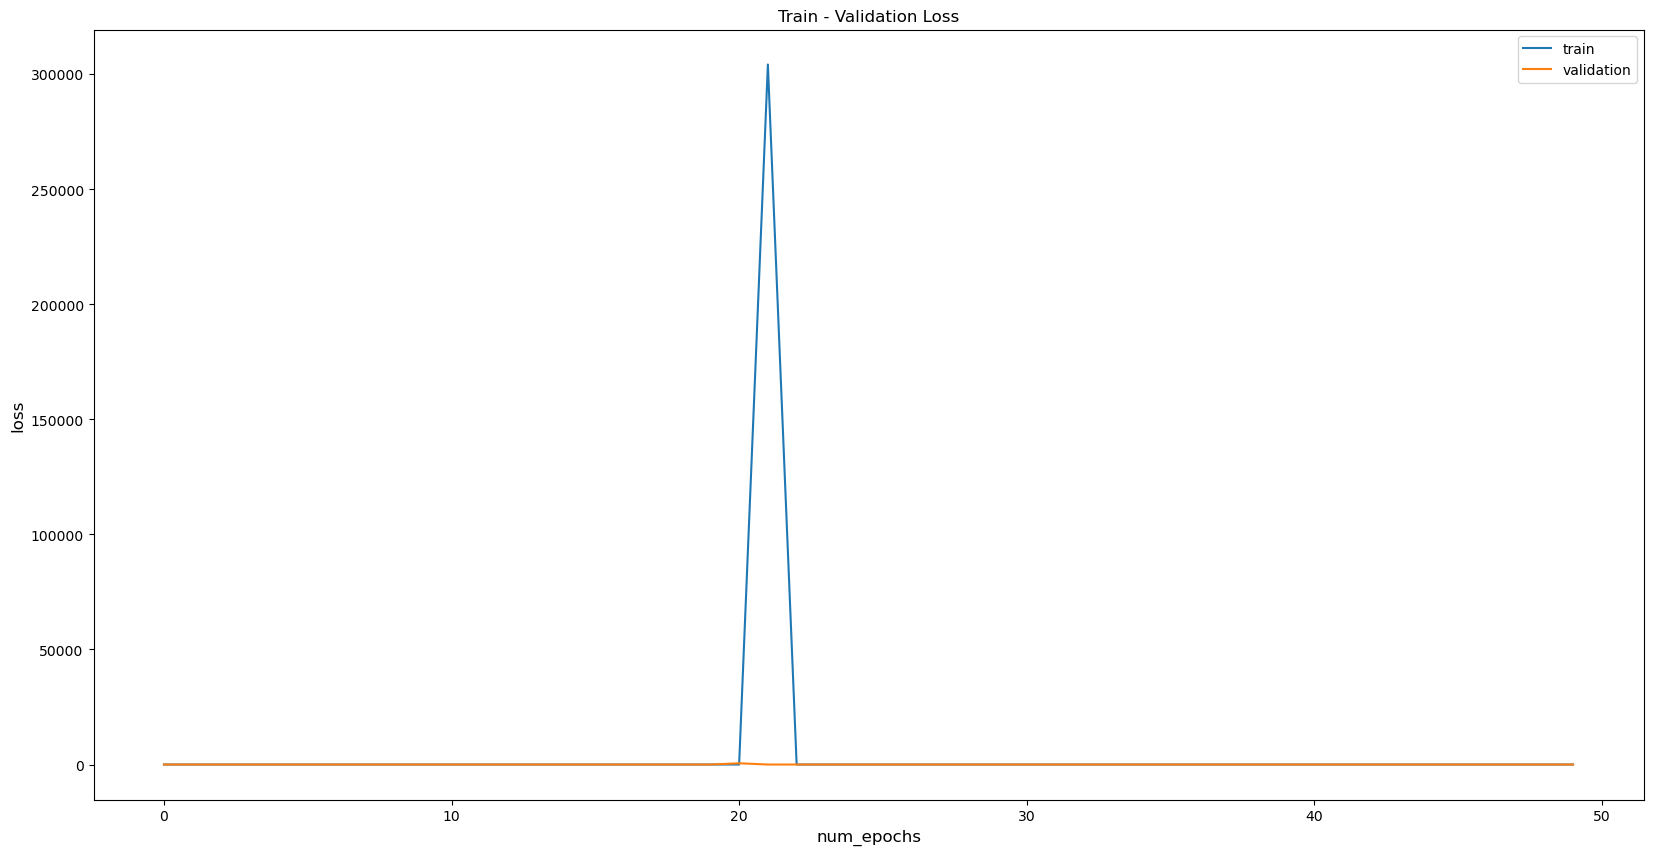

In [106]:
fig = plt.figure(figsize=(20,10))
plt.title("Train - Validation Loss")
plt.plot( history_lstm.history['loss'], label='train')
plt.plot( history_lstm.history['val_loss'], label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc='best')

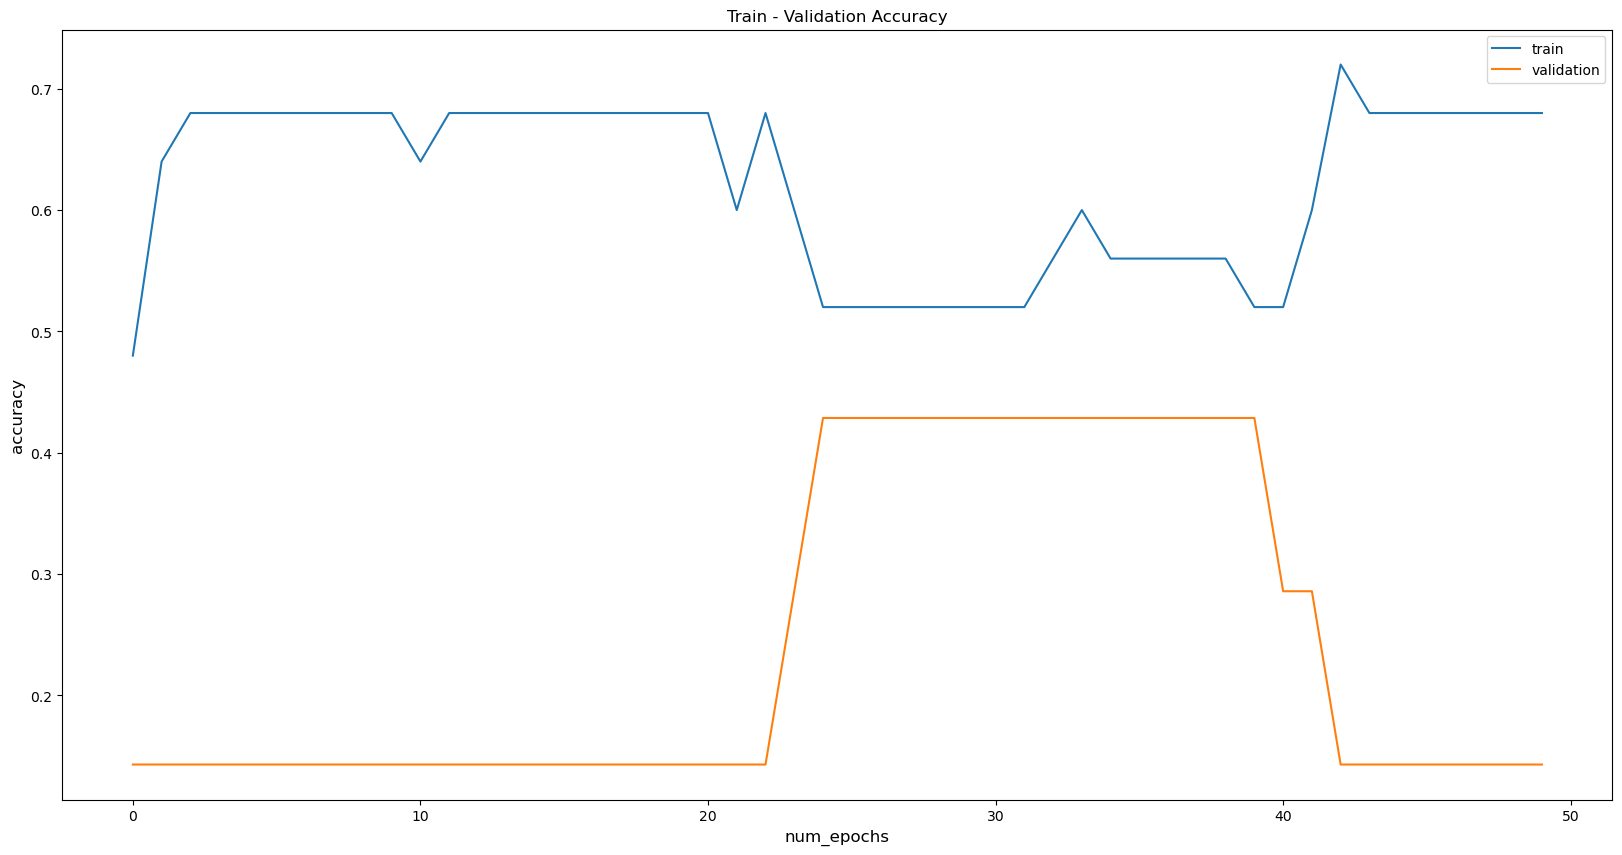

In [107]:
fig = plt.figure(figsize=(20,10))
plt.title("Train - Validation Accuracy")
plt.plot(history_lstm.history['accuracy'], label='train')
plt.plot(history_lstm.history['val_accuracy'], label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')